# Project: Investigate TMDb data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset in use**: TMDb movie data
>
> I will try to answer the following questions

> 1. Which genres are most popular from year to year? 
> 2. What kinds of properties are associated with movies that have high revenues?

In [2]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Read the data file
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

Observation: We need to seperate genres data to make sure we can provide accurate statistics

### More Insights

In [4]:
# Display data statistics
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [5]:
# Checking the data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# Check duplicate count
sum(df.duplicated())

1

In [8]:
# Check uniqueness
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# List the release years covered in the dataset
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

Check for popularity outlier since we will use it as our dependent variable during the analysis. It looks like we have three points on the right that need to be removed.

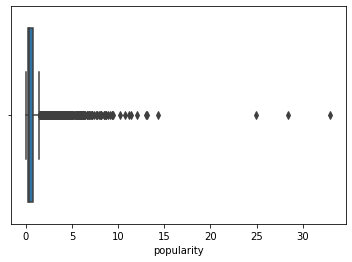

In [10]:
# Check outliers in a box view
sns.boxplot(x=df['popularity']);

### Data Cleaning

In [11]:
# Drop columns that contains many null values and not required for analysis
df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)

In [12]:
# deduplicate date
df.drop_duplicates(inplace=True)

In [13]:
sum(df.duplicated())

0

In [14]:
# Remove null cells
df.dropna(inplace=True)
df.shape

(10724, 17)

Removing popularity outlier

In [15]:
df = df[df.popularity < 20]
df.shape

(10721, 17)

#### Spliting genres into rows to use them asindex in the next step

In [16]:
df_genres = df.copy()
# Check if there is a movie that has a single genre
df_genres[~df_genres['genres'].str.contains('|')]


Empty DataFrame
Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, director, overview, runtime, genres, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

In [17]:
# Get a list of all unique genres in the dataset
hb_genres_series = df_genres['genres'].str.split('|').apply(pd.Series).stack().reset_index(drop=True).unique()
hb_genres_series.size

20

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Which genres are most popular from year to year?

Count the number of movies per genres

In [18]:
# Create a dataframe to use genre as column index and release date in descendig order as column names
genre_year = pd.DataFrame(data=None,index=hb_genres_series,columns=df_genres['release_year'].sort_values(ascending=False).unique())
genre_year.fillna(value=0, inplace=True)
genre_year_popularity = genre_year.copy()

In [19]:
# Fill genre_year with the movies count for each genre
# row is the dataframe row
def count_genres(row):
    for genre in row['genres'].split('|'):
        genre_year.loc[genre, row['release_year']] += 1
df_genres.apply(count_genres, axis = 1)
genre_year.head()

2015  2014  2013  2012  2011  2010  2009  2008  2007  2006  \
Adventure          67    66    65    50    61    58    71    63    58    55   
Science Fiction    82    60    59    54    56    45    68    52    37    30   
Thriller          169   178   175   160   146   133   157   127   123   114   
Action            104   129   118    99   115   106   106    98    92    79   
Fantasy            33    36    38    33    45    42    47    43    45    34   

                 ...  1969  1968  1967  1966  1965  1964  1963  1962  1961  \
Adventure        ...     5     5     7    11     6     5     7     7     6   
Science Fiction  ...     3     4     4     6     2     4     2     2     4   
Thriller         ...     3     5     5     8    11     9    10     7     0   
Action           ...    10     6     7    14     9     5     4     8     7   
Fantasy          ...     2     5     3     2     0     4     2     1     2   

                 1960  
Adventure           5  
Science Fiction     3  
Thriller            6  
Action              8  
Fantasy             2  

[5 rows x 56 columns]

In [20]:
# Adding Max column to hold the year of maximum genre
genre_year['Max'] = genre_year.idxmax(axis=1)
genre_year['Max']

Adventure          2009
Science Fiction    2015
Thriller           2014
Action             2014
Fantasy            2009
Crime              2013
Western            1994
Drama              2014
Family             2011
Animation          2010
Comedy             2009
Mystery            2009
Romance            2010
War                2014
History            2008
Music              2015
Horror             2015
Documentary        2014
TV Movie           2015
Foreign            2008
Name: Max, dtype: int64

Sum up the popularity for genre

In [21]:
# Fill genre_year with the movies sum of popularities for each genre
# row is the dataframe row
def genres_popularity(row):
    for genre in row['genres'].split('|'):
        genre_year_popularity.loc[genre, row['release_year']] += row['popularity']
df_genres.apply(genres_popularity, axis = 1)
genre_year_popularity.head()

2015        2014        2013        2012        2011  \
Adventure        165.175562  137.896141   84.141905   73.073879   69.960181   
Science Fiction  131.560859  117.153816   75.702860   50.663266   54.259455   
Thriller         178.315208  186.496837  128.550095  108.295298  116.041838   
Action           179.448466  216.979690  121.751040  111.986677  121.681073   
Fantasy           57.427532   65.856645   39.531237   46.147053   45.870870   

                      2010        2009       2008       2007       2006  ...  \
Adventure        79.976961   81.909585  63.528230  50.599837  51.830019  ...   
Science Fiction  37.223664   69.338638  40.234346  24.537608  23.845715  ...   
Thriller         99.189172  102.665018  86.206629  91.636161  75.973838  ...   
Action           99.913105   92.929260  88.448413  71.582677  60.183155  ...   
Fantasy          46.726062   50.324097  37.681697  44.364294  34.786562  ...   

                     1969      1968      1967      1966      1965      1964  \
Adventure        3.744663  5.545733  7.178829  3.229519  3.490923  3.682157   
Science Fiction  0.517620  5.374567  0.749862  1.906741  0.203911  0.906544   
Thriller         2.613848  2.779596  3.509897  2.190952  3.773787  5.603219   
Action           5.399760  2.193374  5.064989  3.686859  4.062358  4.065433   
Fantasy          0.408196  2.227921  0.561027  0.849542  0.000000  2.399162   

                     1963      1962      1961      1960  
Adventure        5.099410  6.597594  4.603938  3.504904  
Science Fiction  0.935671  0.358424  1.096410  0.983714  
Thriller         7.199292  5.324075  0.000000  4.871460  
Action           3.806916  5.671563  2.561389  4.725796  
Fantasy          0.428142  0.235542  0.308146  0.856495  

[5 rows x 56 columns]

In [22]:
# Adding Max column to hold the year of maximum genre
genre_year_popularity['Max'] = genre_year_popularity.idxmax(axis=1)
genre_year_popularity['Max']

Adventure          2015
Science Fiction    2015
Thriller           2014
Action             2014
Fantasy            2014
Crime              2015
Western            2015
Drama              2015
Family             2015
Animation          2015
Comedy             2014
Mystery            2015
Romance            2008
War                2014
History            2014
Music              2015
Horror             2015
Documentary        2013
TV Movie           2015
Foreign            2009
Name: Max, dtype: int64

### Research Question 2  What kinds of properties are associated with movies that have high revenues?

In [23]:
# Find the correlation between variables
df.corr()

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000   -0.016113 -0.140122 -0.099675 -0.083821   -0.035016   
popularity   -0.016113    1.000000  0.578850  0.694121  0.146876    0.830649   
budget       -0.140122    0.578850  1.000000  0.734588  0.191008    0.630142   
revenue      -0.099675    0.694121  0.734588  1.000000  0.163639    0.790727   
runtime      -0.083821    0.146876  0.191008  0.163639  1.000000    0.163873   
vote_count   -0.035016    0.830649  0.630142  0.790727  0.163873    1.000000   
vote_average -0.072503    0.236289  0.086076  0.178305  0.177840    0.260775   
release_year  0.510349    0.096407  0.118270  0.057752 -0.119048    0.109126   
budget_adj   -0.187967    0.549620  0.968842  0.706681  0.221655    0.585524   
revenue_adj  -0.138766    0.646449  0.620309  0.918512  0.176696    0.707574   

              vote_average  release_year  budget_adj  revenue_adj  
id               -0.072503      0.510349   -0.187967    -0.138766  
popularity        0.236289      0.096407    0.549620     0.646449  
budget            0.086076      0.118270    0.968842     0.620309  
revenue           0.178305      0.057752    0.706681     0.918512  
runtime           0.177840     -0.119048    0.221655     0.176696  
vote_count        0.260775      0.109126    0.585524     0.707574  
vote_average      1.000000     -0.128441    0.098981     0.199185  
release_year     -0.128441      1.000000    0.018580    -0.066594  
budget_adj        0.098981      0.018580    1.000000     0.645196  
revenue_adj       0.199185     -0.066594    0.645196     1.000000

Revenue has a positively correlation with vote_count, budget, and popularity

Let's plot each variable to see how data looks like

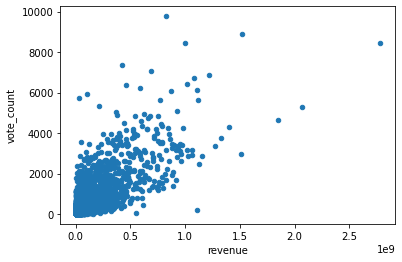

In [24]:
df.plot(x='revenue', y='vote_count', kind='scatter');

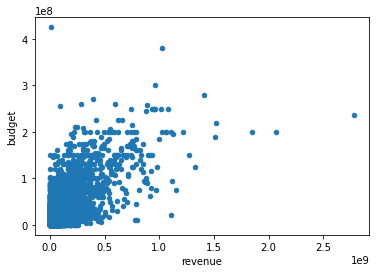

In [25]:
df.plot(x='revenue', y='budget', kind='scatter');


<a id='conclusions'></a>
## Conclusions

The popularity of genre listed by year 

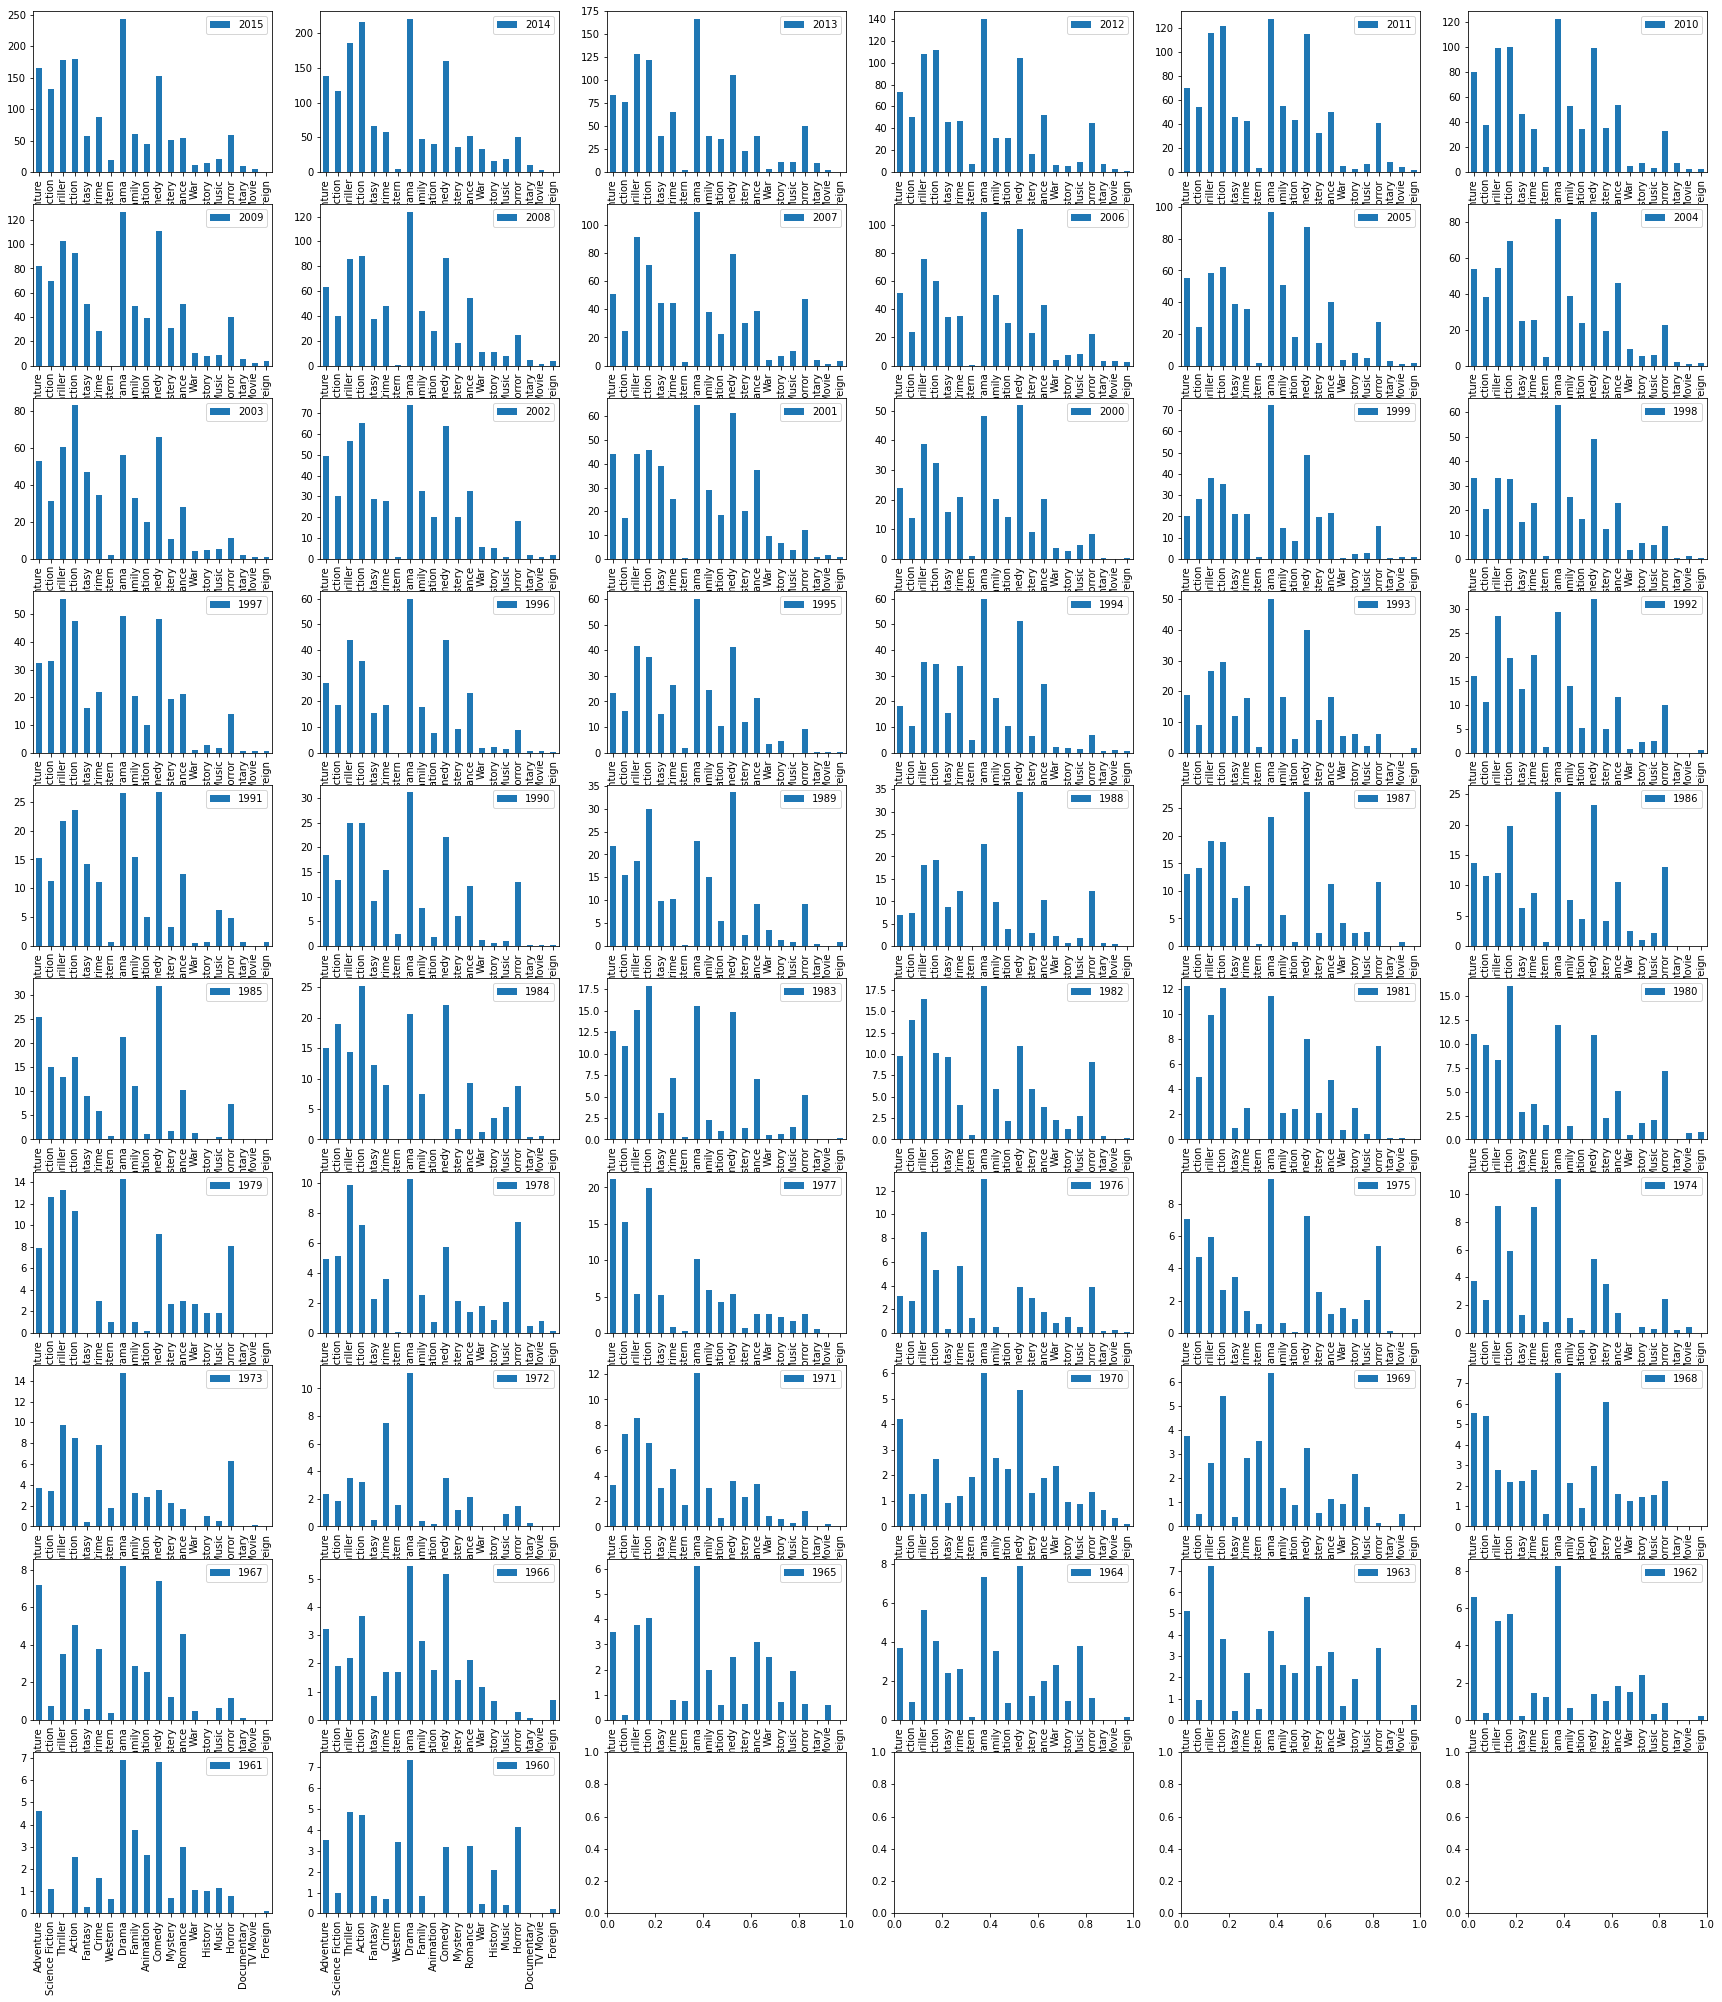

In [26]:
# Plot the relation between genre and popularity for each year
fig, ax = plt.subplots(10, 6)
fig.set_figheight(35)
fig.set_figwidth(30)
for col in range(0, len(genre_year_popularity.columns) - 1):
    genre_year_popularity.plot(y=genre_year_popularity.columns[col], kind="bar", ax=ax[int(col / 6), col % 6])

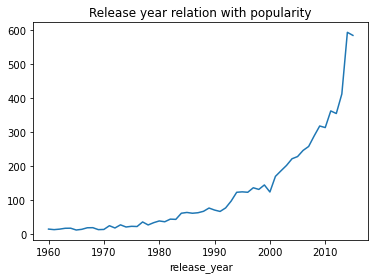

In [27]:
df.groupby(by='release_year').sum()['popularity'].plot(title='Release year relation with popularity');

The above plot show that the popularity is increasing from year to year. Thus, we can't use it for comparing popularity between years. A better way for comparing genre's popularity is to use count of each genre.

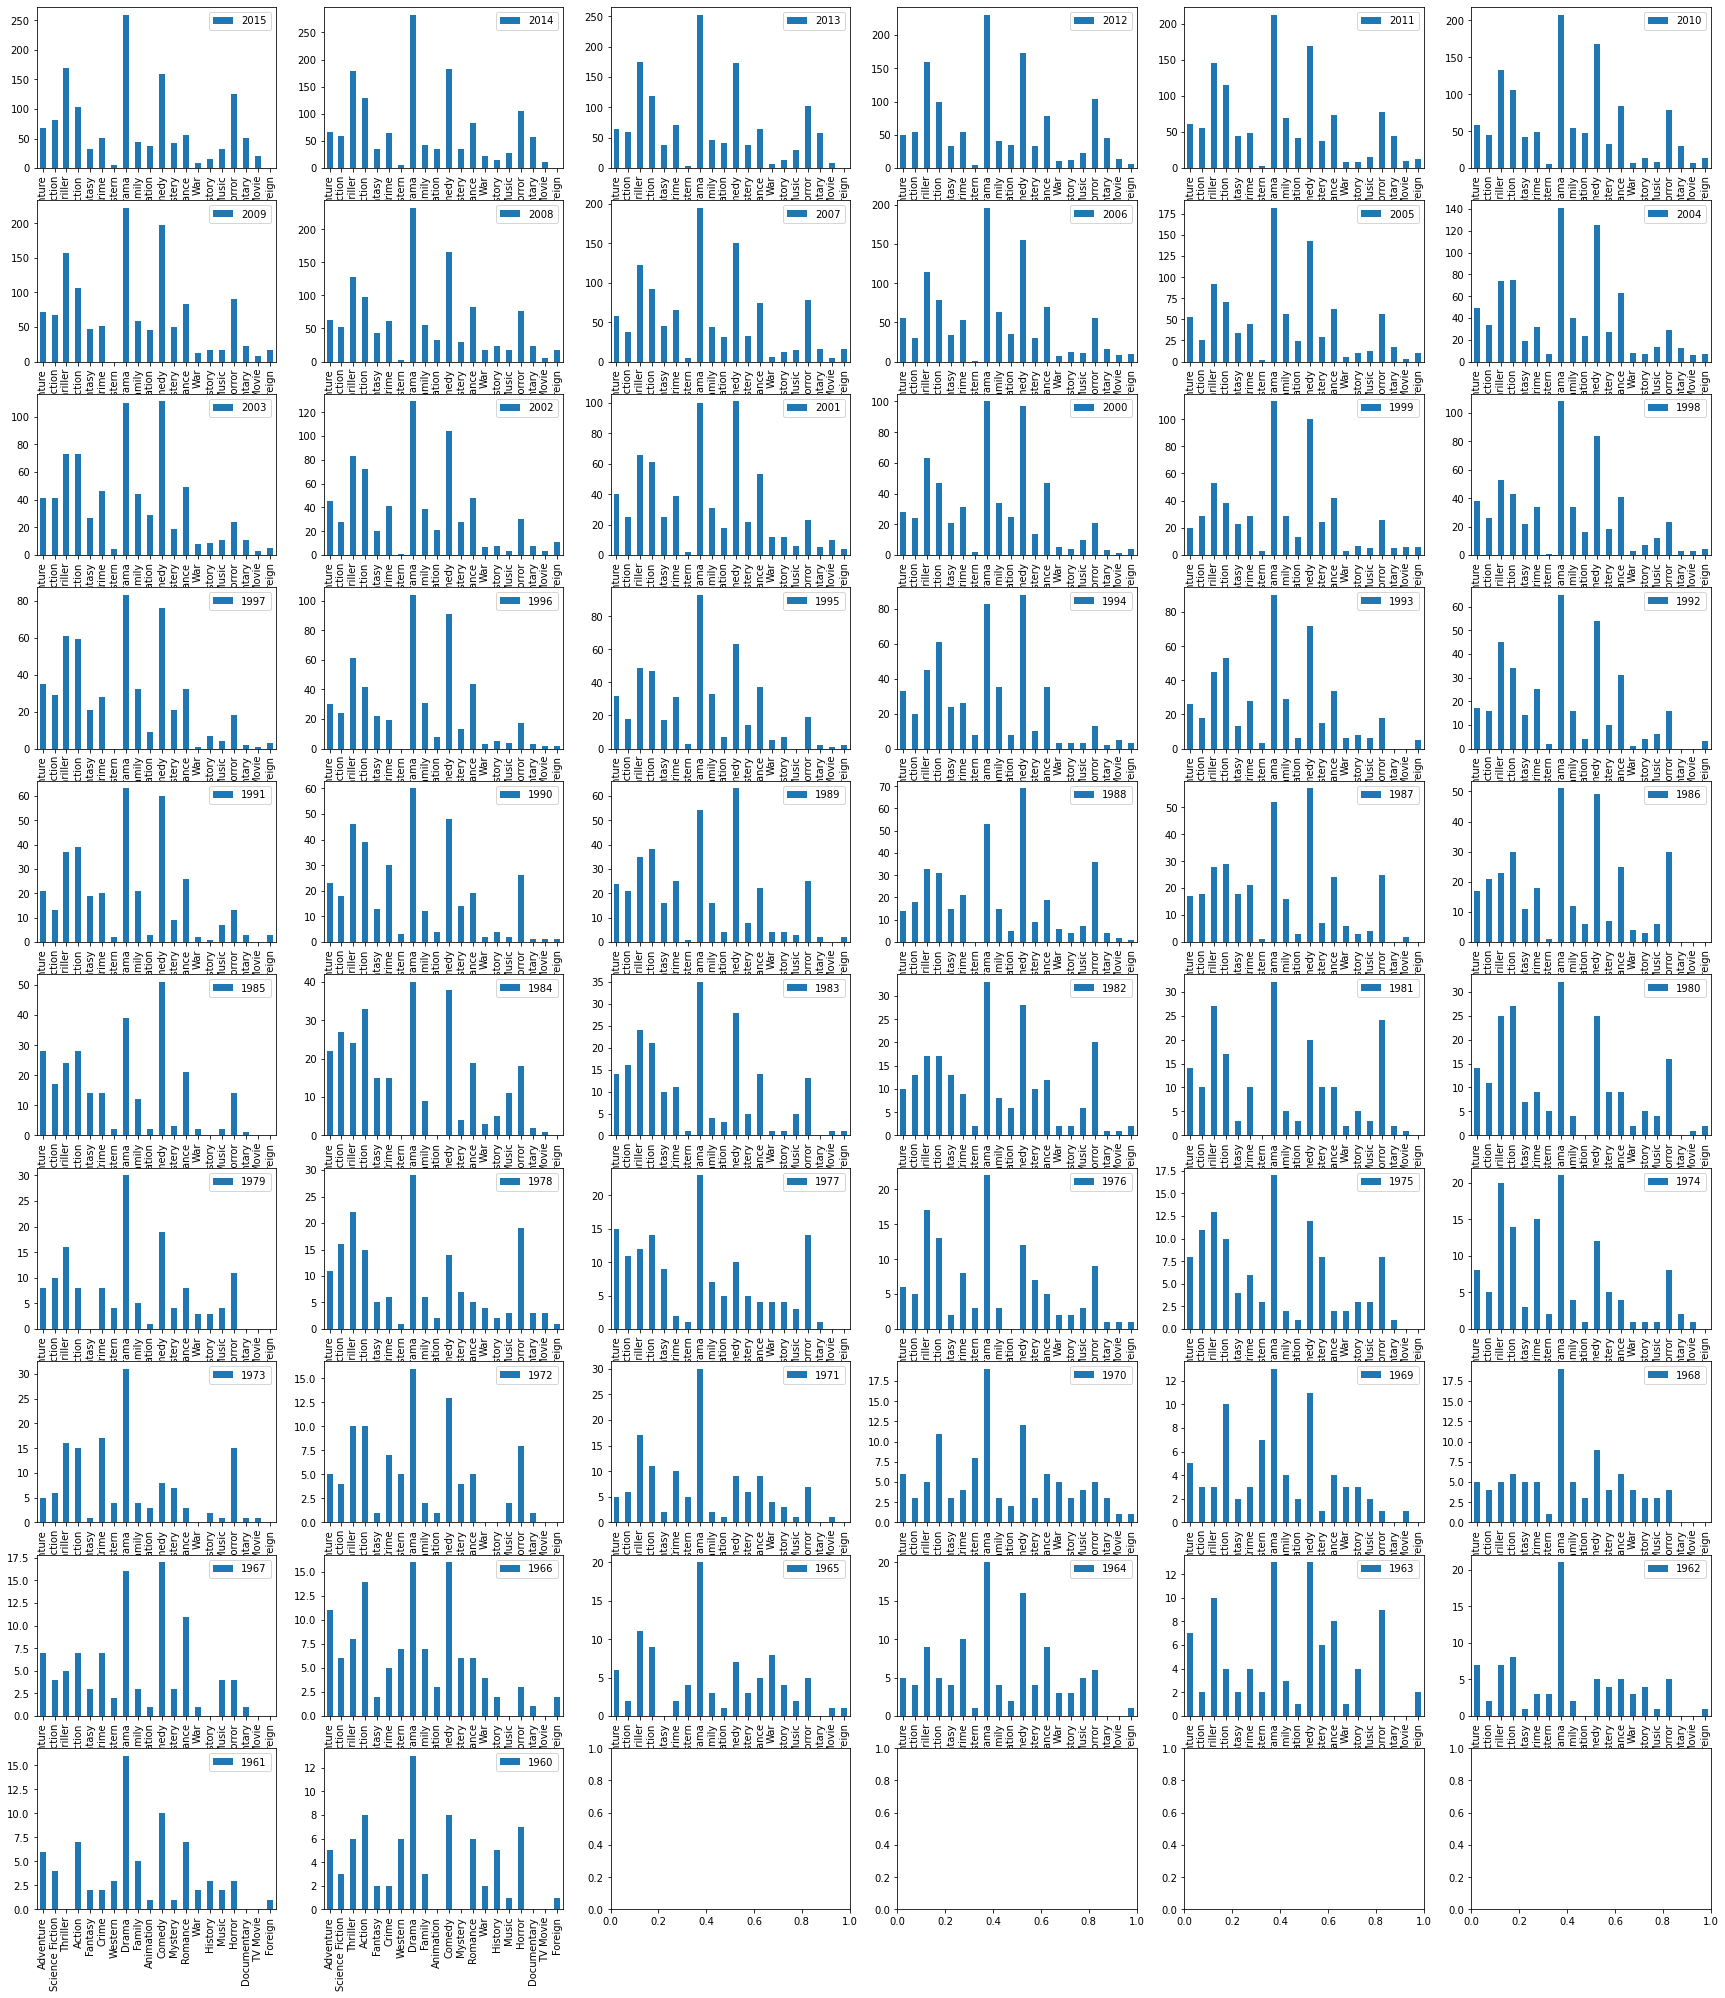

In [28]:
# Plot the relation between genre and movies count for each year
fig, ax = plt.subplots(10, 6)
fig.set_figheight(35)
fig.set_figwidth(30)
for col in range(0, len(genre_year.columns) - 1):
    genre_year.plot(y=genre_year.columns[col], kind="bar", ax=ax[int(col / 6), col % 6])

For the last 12 years the most frequent genre is Drama followed by Comedy

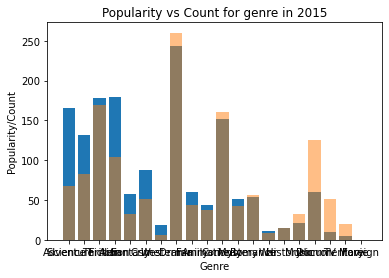

In [29]:
plt.bar(genre_year.index.tolist(), genre_year_popularity[2015])
plt.bar(genre_year.index.tolist(), genre_year[2015], alpha=0.5) # Use alpha to make the front bar a little transparent to see what is behind
plt.title("Popularity vs Count for genre in 2015")
plt.xlabel("Genre")
plt.ylabel("Popularity/Count");

We can see that in 2015 the Drama is the most popular genre and also has the most number of movies produced. On the other side, we can see that action movies is the second popular genre but it is positioned the forth with respect to production count. So that we can see that the genre popularity is not always the motivation for producers.

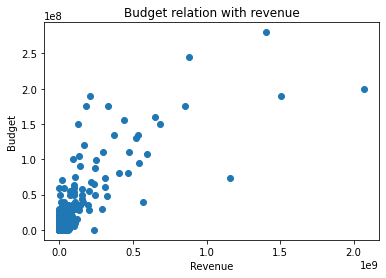

In [30]:

plt.scatter(df[df.release_year==2015]['revenue'], df[df.release_year==2015]['budget'])
plt.title("Budget relation with revenue")
plt.xlabel("Revenue")
plt.ylabel("Budget");


Popularity is weakly corelated to revenue as it depends more on votes. This could show that popularity and votes are not the only source of revenu.

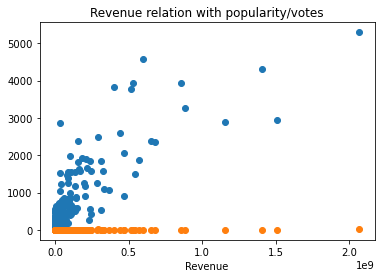

In [31]:
plt.scatter(df[df.release_year==2015]['revenue'], df[df.release_year==2015]['vote_count'])
plt.scatter(df[df.release_year==2015]['revenue'], df[df.release_year==2015]['popularity'])
plt.title("Revenue relation with popularity/votes")
plt.xlabel("Revenue");

It is obvious that the budget, vote_count, and popularity directly propotional to revenue in most cases.
Let's take more insights by looking at the maximus revenue movie

In [32]:
df[df.revenue==df.revenue.max()]

id    imdb_id  popularity     budget     revenue original_title  \
1386  19995  tt0499549    9.432768  237000000  2781505847         Avatar   

                                                   cast       director  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...  James Cameron   

                                               overview  runtime  \
1386  In the 22nd century, a paraplegic Marine is di...      162   

                                        genres release_date  vote_count  \
1386  Action|Adventure|Fantasy|Science Fiction     12/10/09        8458   

      vote_average  release_year    budget_adj   revenue_adj  
1386           7.1          2009  2.408869e+08  2.827124e+09

|            | Value | Max value |
|------------|-------|-----------|
| budget     |237000000       |  4.250000e+08         |
| vote_count | 8458      |    9767       |
| popularity |9.432768       |    32.985763       |

The table above compare the values for maximum revenue movie with the absolutely maximum values of the three dependent variables we are analysing. The result confirm the correlation coefficient by example as vote_count is the strongest correlated to revenue and the nearest value to maximum.

### Limitations

The data not containing some data that could affect the analysis. An example of these data is

1. Is the story published in a book or book series before being a movie?
2. Who is the writer of the film?
3. It's better to know the revenue of distribution inside and outside the US. This piece of information could help us see the popularity worldwide.
4. Rewards given for the movie or movie's crew could make people more likely to want to watch it. If we have this missing data, we could analyze relations better.
